<a href="https://colab.research.google.com/github/bilalahmad734426-cell/bill/blob/main/bilal%20coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cybersecurity dataset shape: (9537, 11)
  session_id  network_packet_size protocol_type  login_attempts  \
0  SID_00001                  599           TCP               4   
1  SID_00002                  472           TCP               3   
2  SID_00003                  629           TCP               3   
3  SID_00004                  804           UDP               4   
4  SID_00005                  453           TCP               5   

   session_duration encryption_used  ip_reputation_score  failed_logins  \
0        492.983263             DES             0.606818              1   
1       1557.996461             DES             0.301569              0   
2         75.044262             DES             0.739164              2   
3        601.248835             DES             0.123267              0   
4        532.540888             AES             0.054874              1   

  browser_type  unusual_time_access  attack_detected  
0         Edge                    0                

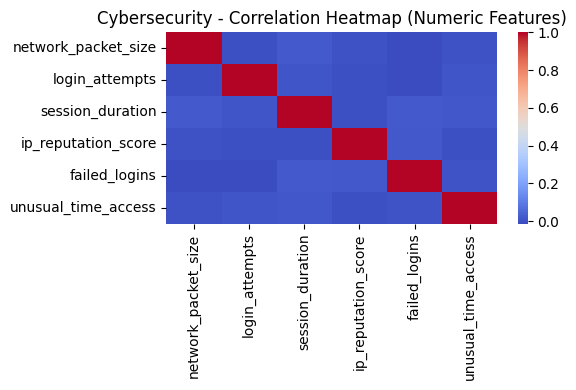


=== Cyber - Logistic Regression ===
Accuracy : 0.7170
Precision: 0.6764
Recall   : 0.7034
F1-score : 0.6897
ROC-AUC  : 0.7876

Classification report:
              precision    recall  f1-score   support

           0     0.7522    0.7280    0.7399      1055
           1     0.6764    0.7034    0.6897       853

    accuracy                         0.7170      1908
   macro avg     0.7143    0.7157    0.7148      1908
weighted avg     0.7183    0.7170    0.7174      1908



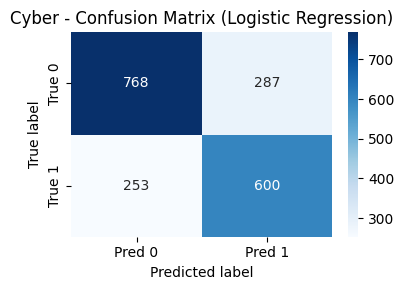

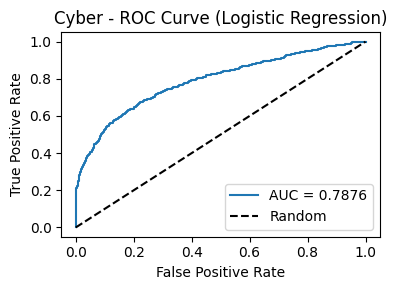


=== Cyber - Random Forest ===
Accuracy : 0.8831
Precision: 0.9891
Recall   : 0.7468
F1-score : 0.8510
ROC-AUC  : 0.8785

Classification report:
              precision    recall  f1-score   support

           0     0.8291    0.9934    0.9038      1055
           1     0.9891    0.7468    0.8510       853

    accuracy                         0.8831      1908
   macro avg     0.9091    0.8701    0.8774      1908
weighted avg     0.9007    0.8831    0.8802      1908



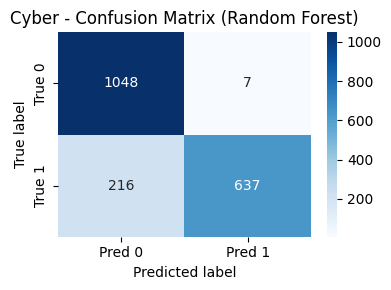

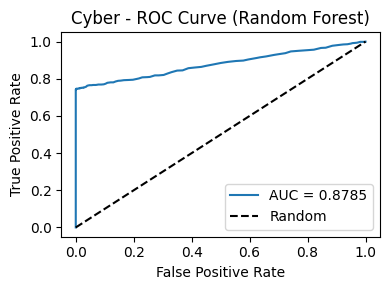


=== Cyber - Gradient Boosting ===
Accuracy : 0.8857
Precision: 0.9984
Recall   : 0.7456
F1-score : 0.8537
ROC-AUC  : 0.8773

Classification report:
              precision    recall  f1-score   support

           0     0.8293    0.9991    0.9063      1055
           1     0.9984    0.7456    0.8537       853

    accuracy                         0.8857      1908
   macro avg     0.9138    0.8723    0.8800      1908
weighted avg     0.9049    0.8857    0.8828      1908



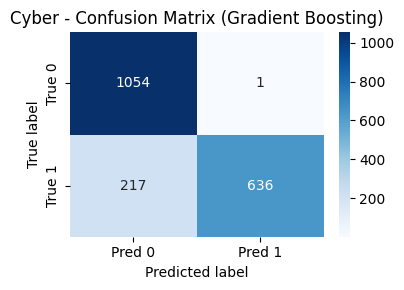

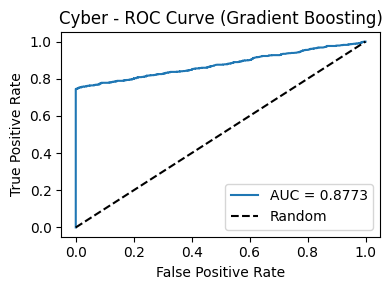


=== Cybersecurity Intrusion Detection - Model Comparison ===
                      model  accuracy  precision   recall       f1  roc_auc
Cyber - Logistic Regression  0.716981   0.676437 0.703400 0.689655 0.787632
      Cyber - Random Forest  0.883124   0.989130 0.746776 0.851035 0.878539
  Cyber - Gradient Boosting  0.885744   0.998430 0.745604 0.853691 0.877323


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    classification_report, roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# -------------------------------------------------------------------
# Helper functions
# -------------------------------------------------------------------

def evaluate_classification_model(name, y_true, y_pred, y_proba=None):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    if y_proba is not None:
        try:
            auc = roc_auc_score(y_true, y_proba)
        except ValueError:
            auc = np.nan
    else:
        auc = np.nan

    print(f"\n=== {name} ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    if not np.isnan(auc):
        print(f"ROC-AUC  : {auc:.4f}")

    print("\nClassification report:")
    print(classification_report(y_true, y_pred, digits=4, zero_division=0))

    return {
        "model": name,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": auc
    }


def plot_confusion_matrix_pretty(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Pred 0", "Pred 1"],
        yticklabels=["True 0", "True 1"]
    )
    plt.title(title)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()


def plot_roc_curve_pretty(y_true, y_proba, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    plt.plot([0, 1], [0, 1], "k--", label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()


# -------------------------------------------------------------------
# Part 1: Cybersecurity Intrusion Detection ONLY
# -------------------------------------------------------------------

# 1.1 Load dataset (update this path to your actual CSV location)
CYBER_PATH = "/content/Cybersecurity Intrusion Detection(4).csv"
cyber = pd.read_csv(CYBER_PATH)

print("Cybersecurity dataset shape:", cyber.shape)
print(cyber.head())

print("\nCybersecurity dataset info:")
print(cyber.info())

# Target and ID columns
cyber_target = "attack_detected"
cyber_id_col = "session_id"

print("\nAttack_detected class distribution (proportion):")
print(cyber[cyber_target].value_counts(normalize=True))

# 1.2 Feature types
numeric_cols_cyber = [
    col for col in cyber.columns
    if col not in [cyber_target, cyber_id_col] and cyber[col].dtype != "object"
]

categorical_cols_cyber = [
    col for col in cyber.columns
    if col not in [cyber_target, cyber_id_col] and cyber[col].dtype == "object"
]

print("\nNumeric features (Cyber):", numeric_cols_cyber)
print("Categorical features (Cyber):", categorical_cols_cyber)

# 1.3 Simple EDA: correlation heatmap for numeric features
if len(numeric_cols_cyber) > 1:
    plt.figure(figsize=(6, 4))
    sns.heatmap(cyber[numeric_cols_cyber].corr(), annot=False, cmap="coolwarm")
    plt.title("Cybersecurity - Correlation Heatmap (Numeric Features)")
    plt.tight_layout()
    plt.show()

# 1.4 Train–test split
X_cyber = cyber.drop(columns=[cyber_target, cyber_id_col])
y_cyber = cyber[cyber_target].astype(int)

X_train_cyber, X_test_cyber, y_train_cyber, y_test_cyber = train_test_split(
    X_cyber,
    y_cyber,
    test_size=0.2,
    random_state=42,
    stratify=y_cyber
)

# 1.5 Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# IMPORTANT: Option D – missing treated as its own category is already handled here.
# OneHotEncoder will treat np.nan as a distinct category if present.
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor_cyber = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols_cyber),
        ("cat", categorical_transformer, categorical_cols_cyber),
    ]
)

# 1.6 Define models
models_cyber = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        class_weight="balanced"
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        n_jobs=-1,
        class_weight="balanced"
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42
    )
}

results_cyber = []

# 1.7 Train + evaluate models
for name, clf in models_cyber.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor_cyber),
        ("model", clf)
    ])

    pipe.fit(X_train_cyber, y_train_cyber)
    y_pred = pipe.predict(X_test_cyber)

    if hasattr(pipe.named_steps["model"], "predict_proba"):
        y_proba = pipe.predict_proba(X_test_cyber)[:, 1]
    else:
        y_proba = None

    metrics = evaluate_classification_model(
        f"Cyber - {name}",
        y_test_cyber,
        y_pred,
        y_proba
    )
    results_cyber.append(metrics)

    plot_confusion_matrix_pretty(
        y_test_cyber,
        y_pred,
        title=f"Cyber - Confusion Matrix ({name})"
    )

    if y_proba is not None:
        plot_roc_curve_pretty(
            y_test_cyber,
            y_proba,
            title=f"Cyber - ROC Curve ({name})"
        )

# 1.8 Model comparison table
df_results_cyber = pd.DataFrame(results_cyber)
print("\n=== Cybersecurity Intrusion Detection - Model Comparison ===")
print(df_results_cyber.to_string(index=False))